In [5]:
# Installations
!pip install diffusers
!pip install accelerate
#!pip install -I transformers --no-cache-dir --force-reinstall --user

     ---------------------------------------- 191.5/191.5 kB ? eta 0:00:00


In [1]:
# Imports
import torch
from torch import autocast
from diffusers import StableDiffusionPipeline

C:\Users\gabri\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\gabri\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\gabri\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# Used to visualize
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Get the model
pipe = StableDiffusionPipeline.from_pretrained(
    'hakurei/waifu-diffusion',
    torch_dtype=torch.float16,
    cache_dir="D:/python-libs/hugging-face-cache"
).to('cuda')

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

In [4]:
# Remove filter
pipe.safety_checker = lambda images, clip_input: (images, False)

In [5]:
# Model details:
# https://gist.github.com/harubaru/f727cedacae336d1f7877c4bbe2196e1
# Settings:
# https://danbooru.donmai.us/wiki_pages/tag_group:image_composition

In [68]:
# Create the image
settings = "1girl, very wide shot, simple background, solo focus, feamle focus, looking at viewer, ratio:16:9"
characteristics = "waifu, female, brown hair, blue eyes, sidelocks, slight blush, fox ears"
sent = "happy"
summary = "'I hope get know better' to viewer"
prompt = f"{settings} {characteristics} {','+sent if len(sent)!=0 else ''}, {summary}"
with autocast("cuda"):
    image = pipe(prompt, guidance_scale=10)["images"][0]

  0%|          | 0/50 [00:00<?, ?it/s]

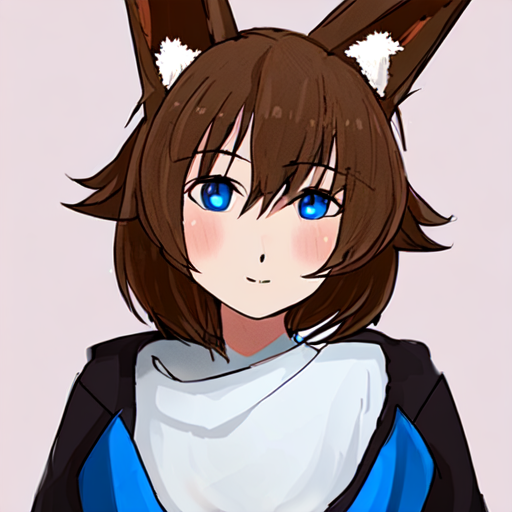

In [69]:
display(image)

In [257]:
image.save("test.png")